https://yeong-jin-data-blog.tistory.com/entry/%EC%82%AC%EC%A0%84%ED%95%99%EC%8A%B5-%EB%AA%A8%EB%8D%B8-%EC%82%AC%EC%9A%A9
<br>
테스트 이미지 넣는 코드 (완료)

1_try 사본에서 데이터셋을 얼굴로 확대한 버전으로 바꾼걸로 알고있음. 2_try에서는 모델 구조를 좀 바꿀 것임. 일단 테스트부터

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import cv2
import skimage.io as io
from skimage.transform import resize
from PIL import Image
import numpy as np
import pandas as pd
from contextlib import contextmanager
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Nadam, RMSprop
from keras.applications import VGG16 
from keras.applications.vgg16 import preprocess_input 
from sklearn.metrics import confusion_matrix, roc_auc_score
%matplotlib inline
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
base_dir='/content/gdrive/MyDrive/emotion_/emotion_data3'
os.stat(base_dir)

os.stat_result(st_mode=16832, st_ino=39, st_dev=38, st_nlink=2, st_uid=0, st_gid=0, st_size=4096, st_atime=1683563015, st_mtime=1682251402, st_ctime=1682251402)

In [ ]:
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
train_happy_dir=os.path.join(train_dir,'happy_train')
train_sad_dir=os.path.join(train_dir,'sad_train')
validation_happy_dir=os.path.join(validation_dir,'happy_valid')
validation_sad_dir=os.path.join(validation_dir,'sad_valid')
'''
print('train_image_happy',len(os.listdir(train_happy_dir)))
print('train_image_happy',len(os.listdir(train_sad_dir)))
print('train_image_happy',len(os.listdir(validation_happy_dir)))
print('train_image_happy',len(os.listdir(validation_sad_dir)))
'''

"\nprint('train_image_happy',len(os.listdir(train_happy_dir)))\nprint('train_image_happy',len(os.listdir(train_sad_dir)))\nprint('train_image_happy',len(os.listdir(validation_happy_dir)))\nprint('train_image_happy',len(os.listdir(validation_sad_dir)))\n"

In [ ]:
from keras import layers
from keras import models
from keras.layers import Activation

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),padding='same',activation='relu',
                        input_shape=(50, 50, 1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid')) #원래 1이었는데 2로 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 25, 25, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 25, 25, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)      

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        color_mode='grayscale',
        batch_size=100,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(50, 50),
        color_mode='grayscale',
        batch_size=40,
        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

KeyboardInterrupt: ignored

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=40,
      epochs=45,
      #callbacks=[callback],
      validation_data=validation_generator,
      validation_steps=30)

<ipython-input-55-cb84cf6e31dd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


RuntimeError: ignored

In [ ]:
print("hello")

hello


In [ ]:
model.save('2_try.h5')

In [3]:
model=tf.keras.models.load_model('/content/gdrive/MyDrive/emotion_/2_try.h5')


In [4]:
def jpg_image_to_array(image_path,size):
  image=Image.open(image_path)
  im_arr=image.resize((size,size))
  im_arr=np.fromstring(image.tobytes(),dtype=np.uint8)
  #print(im_arr.shape)
  im_arr=im_arr.reshape((image.size[0],image.size[1],1))
  print(im_arr.shape)
  
  x=im_arr.astype(np.float32) 
  return x

def image_array_to_1channel(arr):
  arr_avg = (arr[:,:,0]+arr[:,:,1]+arr[:,:,2])/3   
  return arr_avg

In [5]:
from google.colab import files

In [11]:
uploaded=files.upload()

Saving testimg3.jpg to testimg3.jpg


<ipython-input-4-e1fe2d086f3f>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  im_arr=np.fromstring(image.tobytes(),dtype=np.uint8)


(50, 50, 1)
(1, 50, 50, 1)


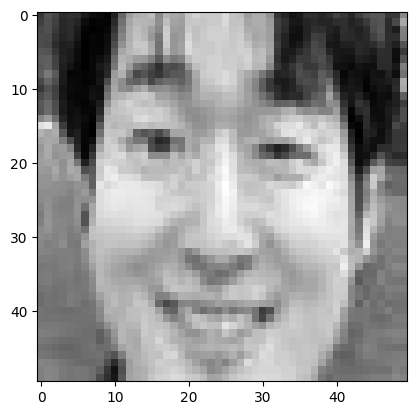

In [13]:
img=tf.keras.utils.load_img("/content/testimg3.jpg",target_size=(50,50))
arr=jpg_image_to_array("/content/testimg3.jpg",50)
plt.imshow(arr,cmap=plt.get_cmap('gray'))
x_train=arr.reshape(1,50,50,1)/255.0
print(x_train.shape)

In [14]:
y_pred=model.predict(x_train)
print(y_pred)

1/1 [==============================] - 0s 22ms/step
[[3.699949e-06]]


In [15]:
(model.predict(x_train)>0.5).astype("int32")

1/1 [==============================] - 0s 21ms/step


array([[0]], dtype=int32)

In [ ]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'happy_train': 0, 'sad_train': 1}
{'happy_valid': 0, 'sad_valid': 1}


In [ ]:
uploaded=files.upload()
for fn in uploaded.keys():

  path='/content/' + fn
  img=tf.keras.utils.load_img(path, target_size=(224, 224))
  
  x=tf.keras.utils.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  images=images.astype(np.float32)
  x=x.astype(np.float32) 
  classes = model.predict(x)

  print(classes[0])

Saving testimg.jpg to testimg (1).jpg


NameError: ignored